<a href="https://colab.research.google.com/github/annatsai0803/IrisSpecies_Clustering/blob/main/Iris_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score


In [ ]:
# Load the Iris dataset
df = px.data.iris()
print(df)
df = df.drop(columns=['species_id'])

print(df.describe())
print(df.isnull().sum())

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

### 1. Classify irises into species using Logistic Regression

In [ ]:
y = df['species']
X = df.drop(columns = ['species'])
from sklearn.model_selection import train_test_split

# split the data randomly into 80% train and 20% test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 42)

# define the model and call it classifier_LR
classifier_LR = LogisticRegression(multi_class='multinomial')

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

y_pred = classifier_LR.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


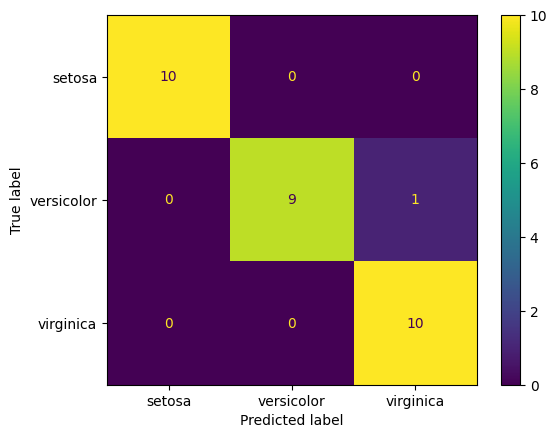

Precision: 0.9697
Recall: 0.9667
Accuracy: 0.9667


In [ ]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier_LR.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_LR.classes_)
disp.plot()
plt.show()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

### 2. Classify irises into species using CART

### 3. Classify irises into species using K-Means Clustering

In [ ]:
# Create a new feature as the ratio of petal length to sepal length
df['petal_sepal_length_ratio'] = df['petal_length'] / df['sepal_length']
fig = px.scatter(df, x='petal_sepal_length_ratio', y='species', color='species', title='Petal to Sepal Length Ratio by Species')
fig.show()
df.to_csv('iris_processed.csv')

In [ ]:
#Scale data before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaled_numerical_features = scaler.fit_transform(df[numerical_cols])
df_scaled_numerical = pd.DataFrame(scaled_numerical_features, columns=numerical_cols, index=df.index)

df = pd.concat([df_scaled_numerical, df['species']], axis=1)
df.petal_sepal_length_ratio.mean()

6.631732200427602e-16

In [ ]:
from sklearn.cluster import KMeans

df1 = df.drop('species', axis=1)

In [ ]:
#Determine the optimal number of clusters using the Elbow Method

wcss = []  # Within-cluster sum of square

# Loop through different numbers of clusters and save the within cluster sum of squares for each number
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=27)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method result
px.line(x=range(1, 11), y=wcss, labels={'x': 'Number of Clusters', 'y': 'WCSS'}, title='Elbow Method', width = 800).show()

In [ ]:
# Perform K-means clustering with the optimal number of clusters
# Assuming the optimal number of clusters is 3 based on the Elbow Method
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=27)
y_kmeans = kmeans.fit_predict(df1)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans.astype(object)


In [ ]:
# Visualize clusters with true species labels

fig_species = px.scatter(df, x='petal_length', y='petal_width',  color='species', title='Iris Dataset by True Species Labels', color_discrete_map={
    'setosa': 'blue',
    'versicolor': 'green',
    'virginica': 'red'
})
fig_species.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# actual labels (y_true) and predicted labels (y_pred) from KMeans clustering
species_mapping = {'setosa': 0, 'versicolor': 2, 'virginica': 1}
df['species_id'] = df['species'].map(species_mapping)


y_true = df['species_id']
y_pred = df['Cluster']
df['Cluster'] = df['Cluster'].astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Calculate precision, recall, and accuracy
precision = precision_score(y_true, y_pred, average='macro')  # Macro-averaged precision
recall = recall_score(y_true, y_pred, average='macro')  # Macro-averaged recall
accuracy = accuracy_score(y_true, y_pred)  # Overall accuracy

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

[[50  0  0]
 [ 0 39 11]
 [ 0 11 39]]
Precision: 0.8533
Recall: 0.8533
Accuracy: 0.8533


### 4. Classify irises into species using Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.figure_factory as ff

In [ ]:
# Fit a dendrogram
dist_single = linkage(df1,method="single")
dist_complete = linkage(df1,method="complete")
dist_average = linkage(df1,method="average")

# Create a dendrogram using Plotly
fig_single = ff.create_dendrogram(dist_single, orientation='bottom')

# Update layout of the figure
fig_single.update_layout(width=1600, height=600, title='Hierarchical Clustering Dendrogram using Single Linkage')
fig_single.show()

# Create two more dendrograms for other linkage methods
fig_complete = ff.create_dendrogram(dist_complete, orientation='bottom')
fig_average = ff.create_dendrogram(dist_average, orientation='bottom')

Compare different linkage methods side-by-side

In [ ]:
# Create a subplot figure
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Single Linkage', 'Average Linkage','Complete Linkage'))

# Add traces from the first Plotly Express figure to the subplot
for trace in fig_single.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from the third Plotly Express figure to the subplot
for trace in fig_average.data:
    fig.add_trace(trace, row=1, col=3)

# Add traces from the second Plotly Express figure to the subplot
for trace in fig_complete.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout if needed
fig.update_layout(height=600, width=1200, title_text="Compare different linkage methods side-by-side")
fig.show()

In [ ]:
df['cluster_hc_single'] = fcluster(dist_single, t=3, criterion='maxclust').astype(object)
df['cluster_hc_average'] = fcluster(dist_average, t=3, criterion='maxclust').astype(object)
df['cluster_hc_complete'] = fcluster(dist_complete, t=3, criterion='maxclust').astype(object)

### Visualize clusters by different linkage methods

In [ ]:
fig_hc_single = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_single', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})
fig_hc_average = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_average', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})
fig_hc_complete = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_complete', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})

fig = make_subplots(rows=1, cols=3, subplot_titles=('Single Linkage', 'Average Linkage','Complete Linkage'))
# Add traces from the first Plotly Express figure to the subplot
for trace in fig_hc_single.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from the second Plotly Express figure to the subplot
for trace in fig_hc_average.data:
    fig.add_trace(trace, row=1, col=2)

# Add traces from the third Plotly Express figure to the subplot
for trace in fig_hc_complete.data:
    fig.add_trace(trace, row=1, col=3)

# Update layout if needed
fig.update_layout(height=600, width=1200, title_text="Compare different linkage methods side-by-side")
fig.show()

In [ ]:
# Create a subplot figure
fig = make_subplots(rows=1, cols=2, subplot_titles=('Iris Dataset Hierarchical Clustering', 'Iris Dataset by True Species Labels'))

# Add traces from the first Plotly Express figure to the subplot
for trace in fig_hc_complete.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from the second Plotly Express figure to the subplot
for trace in fig_species.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout if needed
fig.update_layout(height=600, width=1200, title_text="Iris Dataset Analysis")
fig.show()

In [ ]:
# Assuming you have actual labels (y_true) and predicted labels (y_pred) from your KMeans clustering
species_mapping_complete = {'setosa': 1, 'versicolor': 3, 'virginica': 2}
df['species_id_complete'] = df['species'].map(species_mapping_complete)


y_true_complete = df['species_id_complete']
y_pred_complete = df['cluster_hc_complete']
df['cluster_hc_complete'] = df['cluster_hc_complete'].astype(int)

# Compute confusion matrix
cm_complete = confusion_matrix(y_true_complete, y_pred_complete)
print(cm_complete)

# Calculate precision, recall, and accuracy
precision_complete = precision_score(y_true_complete, y_pred_complete, average='macro')  # Macro-averaged precision
recall_complete = recall_score(y_true_complete, y_pred_complete, average='macro')  # Macro-averaged recall
accuracy_complete = accuracy_score(y_true_complete, y_pred_complete)  # Overall accuracy

print(f"Precision: {precision_complete:.4f}")
print(f"Recall: {recall_complete:.4f}")
print(f"Accuracy: {accuracy_complete:.4f}")

[[50  0  0]
 [ 0 33 17]
 [ 0  0 50]]
Precision: 0.9154
Recall: 0.8867
Accuracy: 0.8867
